# Illustrative linear chain experiment

Exp path: `/network/tmp1/chenant/ant/sr_trace/2021-01-24/23-50-11`

Today: January 24, 2021

In [1]:
import os
import glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files
Just focusing on the checkpoints 

In [2]:
Experiment_Dir = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-01-24/23-50-11'
Checkpoint_wc = 'checkpoint/ckpt*.json'

In_File_list = glob.glob(os.path.join(Experiment_Dir, Checkpoint_wc))
print(len(In_File_list))

# Parse
def script_get_input_dict(path_list):
    in_dict = {}
    for path in path_list:
        partStr = path.split('/')[-1]
        strParts = partStr.split('_')
        agId = '_'.join(strParts[2:]).split('.')[0]
        episIdx = int(strParts[1].split('-')[-1])
        
        with open(path) as f:
            data = json.load(f)
            
        # numpy-fy
        for param_k in data['agent']:
            data['agent'][param_k] = np.array(data['agent'][param_k])
        
        if not agId in in_dict:
            in_dict[agId] = {}
        in_dict[agId][episIdx] = data
        
    return in_dict


In_Dict = script_get_input_dict(In_File_list)
len(In_Dict)

80


8

In [3]:
In_Dict['SFReturnAgent_lamb-0o0'][0]

{'episode_idx': 0,
 'cfg': {'training': {'num_episodes': 10, 'seed': 0},
  'logging': {'dir_path': './', 'print_freq': 100},
  'env': {'cls_string': 'SimpleLinearChainEnv',
   'kwargs': {'n_states': 13, 'skip_prob': 0.0, 'terminal_reward_stdev': 0.0}},
  'agent': {'kwargs': {'lr': 0.9,
    'gamma': 0.9,
    'lamb': 0.0,
    'eta_trace': 0.0,
    'use_true_reward_params': False,
    'use_true_sf_params': False},
   'cls_string': 'SFReturnAgent'}},
 'agent': {'Wr': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9]),
  'Ws': array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    

## Visualize

### Visualize value estimate over episodes

In [4]:
def script_get_value_over_episodes_mat(in_dict):
    epis_limit = 10
    
    out_dict = {}
    
    for ag_k in in_dict:
        wv_list = []
        for epis_i in range(epis_limit):
            cur_Wv = in_dict[ag_k][epis_i]['agent']['Wv']
            wv_list.append(cur_Wv)
        
        out_dict[str(ag_k)] = np.array(wv_list)
            
    
    return out_dict


Value_over_epis_dict = script_get_value_over_episodes_mat(In_Dict)
Value_over_epis_dict.keys()

dict_keys(['SFReturnAgent_lamb-0o95', 'SFReturnAgent_lamb-0o0', 'SFReturnAgent_lamb-0o3', 'SFReturnAgent_lamb-0o5', 'SFReturnAgent_lamb-0o9', 'SFReturnAgent_lamb-0o7', 'SFReturnAgent_lamb-0o8', 'SFReturnAgent_lamb-1o0'])

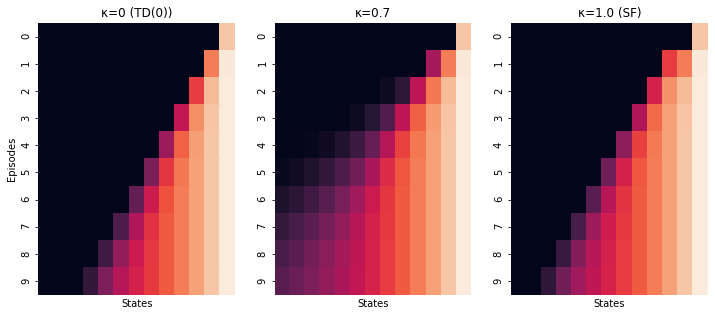

In [5]:
def script_plot_value_over_episodes(v_dict):
    keys = ['SFReturnAgent_lamb-0o0', 'SFReturnAgent_lamb-0o7','SFReturnAgent_lamb-1o0']
    titles = ['κ=0 (TD(0))', 'κ=0.7', 'κ=1.0 (SF)']
    
    plt.figure(figsize=(12,5))
    plt.title('Value')
    
    for i, k in enumerate(keys):
        curmat = v_dict[k]
        
        plt.subplot(1,len(keys), i+1)
        
        cur_cbar = True if (i == (len(keys)-1)) else False
        #cur_yticklabels = True if (i == 0) else False
        sns.heatmap(curmat, xticklabels=False, yticklabels=True,
                    cbar=False)
        _ = plt.ylabel('Episodes') if (i==0) else plt.ylabel('')
        plt.xlabel('States')
        
        plt.title(titles[i])
        pass
    pass
script_plot_value_over_episodes(Value_over_epis_dict)

Episode: 0, State: 0


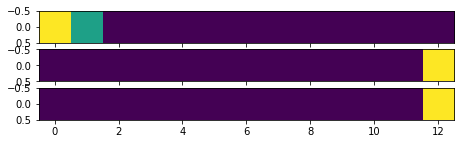

In [11]:
def script_plot_component_at_episode(data_dict, ag_key, epis_idx, state_idx):
    
    plt.figure(figsize=(8,2))
    print(f'Episode: {epis_idx}, State: {state_idx}')
    
    plt.subplot(3,1,1)
    cur_vec = In_Dict[ag_key][epis_idx]['agent']['Ws'][0,state_idx,:]
    cur_vec = cur_vec.reshape(1,13)
    plt.imshow(cur_vec)
    
    plt.subplot(3,1,2)
    cur_vec = In_Dict[ag_key][epis_idx]['agent']['Wr']
    cur_vec = cur_vec.reshape(1,13)
    plt.imshow(cur_vec)
    
    plt.subplot(3,1,3)
    cur_vec = In_Dict[ag_key][epis_idx]['agent']['Wv']
    cur_vec = cur_vec.reshape(1,13)
    plt.imshow(cur_vec)
    
    
    
script_plot_component_at_episode(In_Dict, 'SFReturnAgent_lamb-0o7', 0, 0)

Episode: 7, State: 0


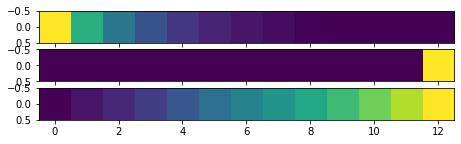

In [18]:
script_plot_component_at_episode(In_Dict, 'SFReturnAgent_lamb-0o7', 7, 0)

Seems like SF has one-step advantage since it doesn't need to learn about itself first. But, point still stands.

Episode: 7, State: 0


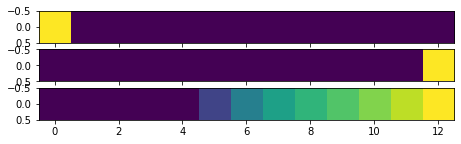

In [19]:
script_plot_component_at_episode(In_Dict, 'SFReturnAgent_lamb-0o0', 7, 0)

Episode: 7, State: 0


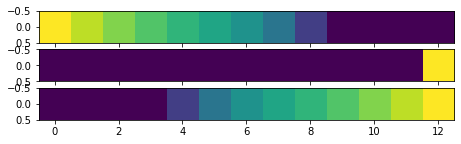

In [20]:
script_plot_component_at_episode(In_Dict, 'SFReturnAgent_lamb-1o0', 7, 0)

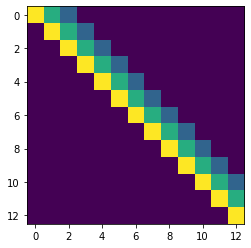

In [10]:
plt.imshow(In_Dict['SFReturnAgent_lamb-0o7'][1]['agent']['Ws'][0])